<a href="https://colab.research.google.com/github/cclljj/Google_colab_ipynb/blob/master/Use_Python_to_Get_Browser_screenshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 網頁畫面批次擷取工具


In [138]:
# 安裝相關函式庫
!apt update
!apt install chromium-chromedriver
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,528 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/grap

In [158]:
from selenium import webdriver
from time import sleep 
from PIL import Image
import numpy as np

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("--window-size=1280x1024")
options.add_argument('--ignore-certificate-errors')
options.add_argument('--ignore-certificate-errors-spki-list')
options.add_argument('--ignore-ssl-errors')
options.add_argument('--disable-dev-shm-usage')

In [159]:
# 請依照範例設定所需要產製的網站畫面網址列表

sites = {"1": "https://www.google.com",
         "2": "https://www.microsoft.com",
         "3": "https://www.apple.com",
         "4": "https://www.amazon.com"}

# 最後輸出檔的檔案名稱
fname_out = "output.png"

# 圖片中每一列的網站數目
num_of_col = 2

In [160]:
# 依照輸入的網址列表，依序產製個別的網站截圖

fnames = []

wd = webdriver.Chrome(options=options)
for fname in sites:
  wd.get(sites[fname])
  sleep(1)
  wd.get_screenshot_as_file(str(fname) + ".png") 
  fnames.append(str(fname) + ".png")

if len(fnames) % num_of_col:
  white_img = Image.new('RGB', (1280, 1024), color = (255,255,255))
  white_img.save("white.png")
  for i in range(0, num_of_col - len(fnames) % num_of_col):
    fnames.append("white.png")
  

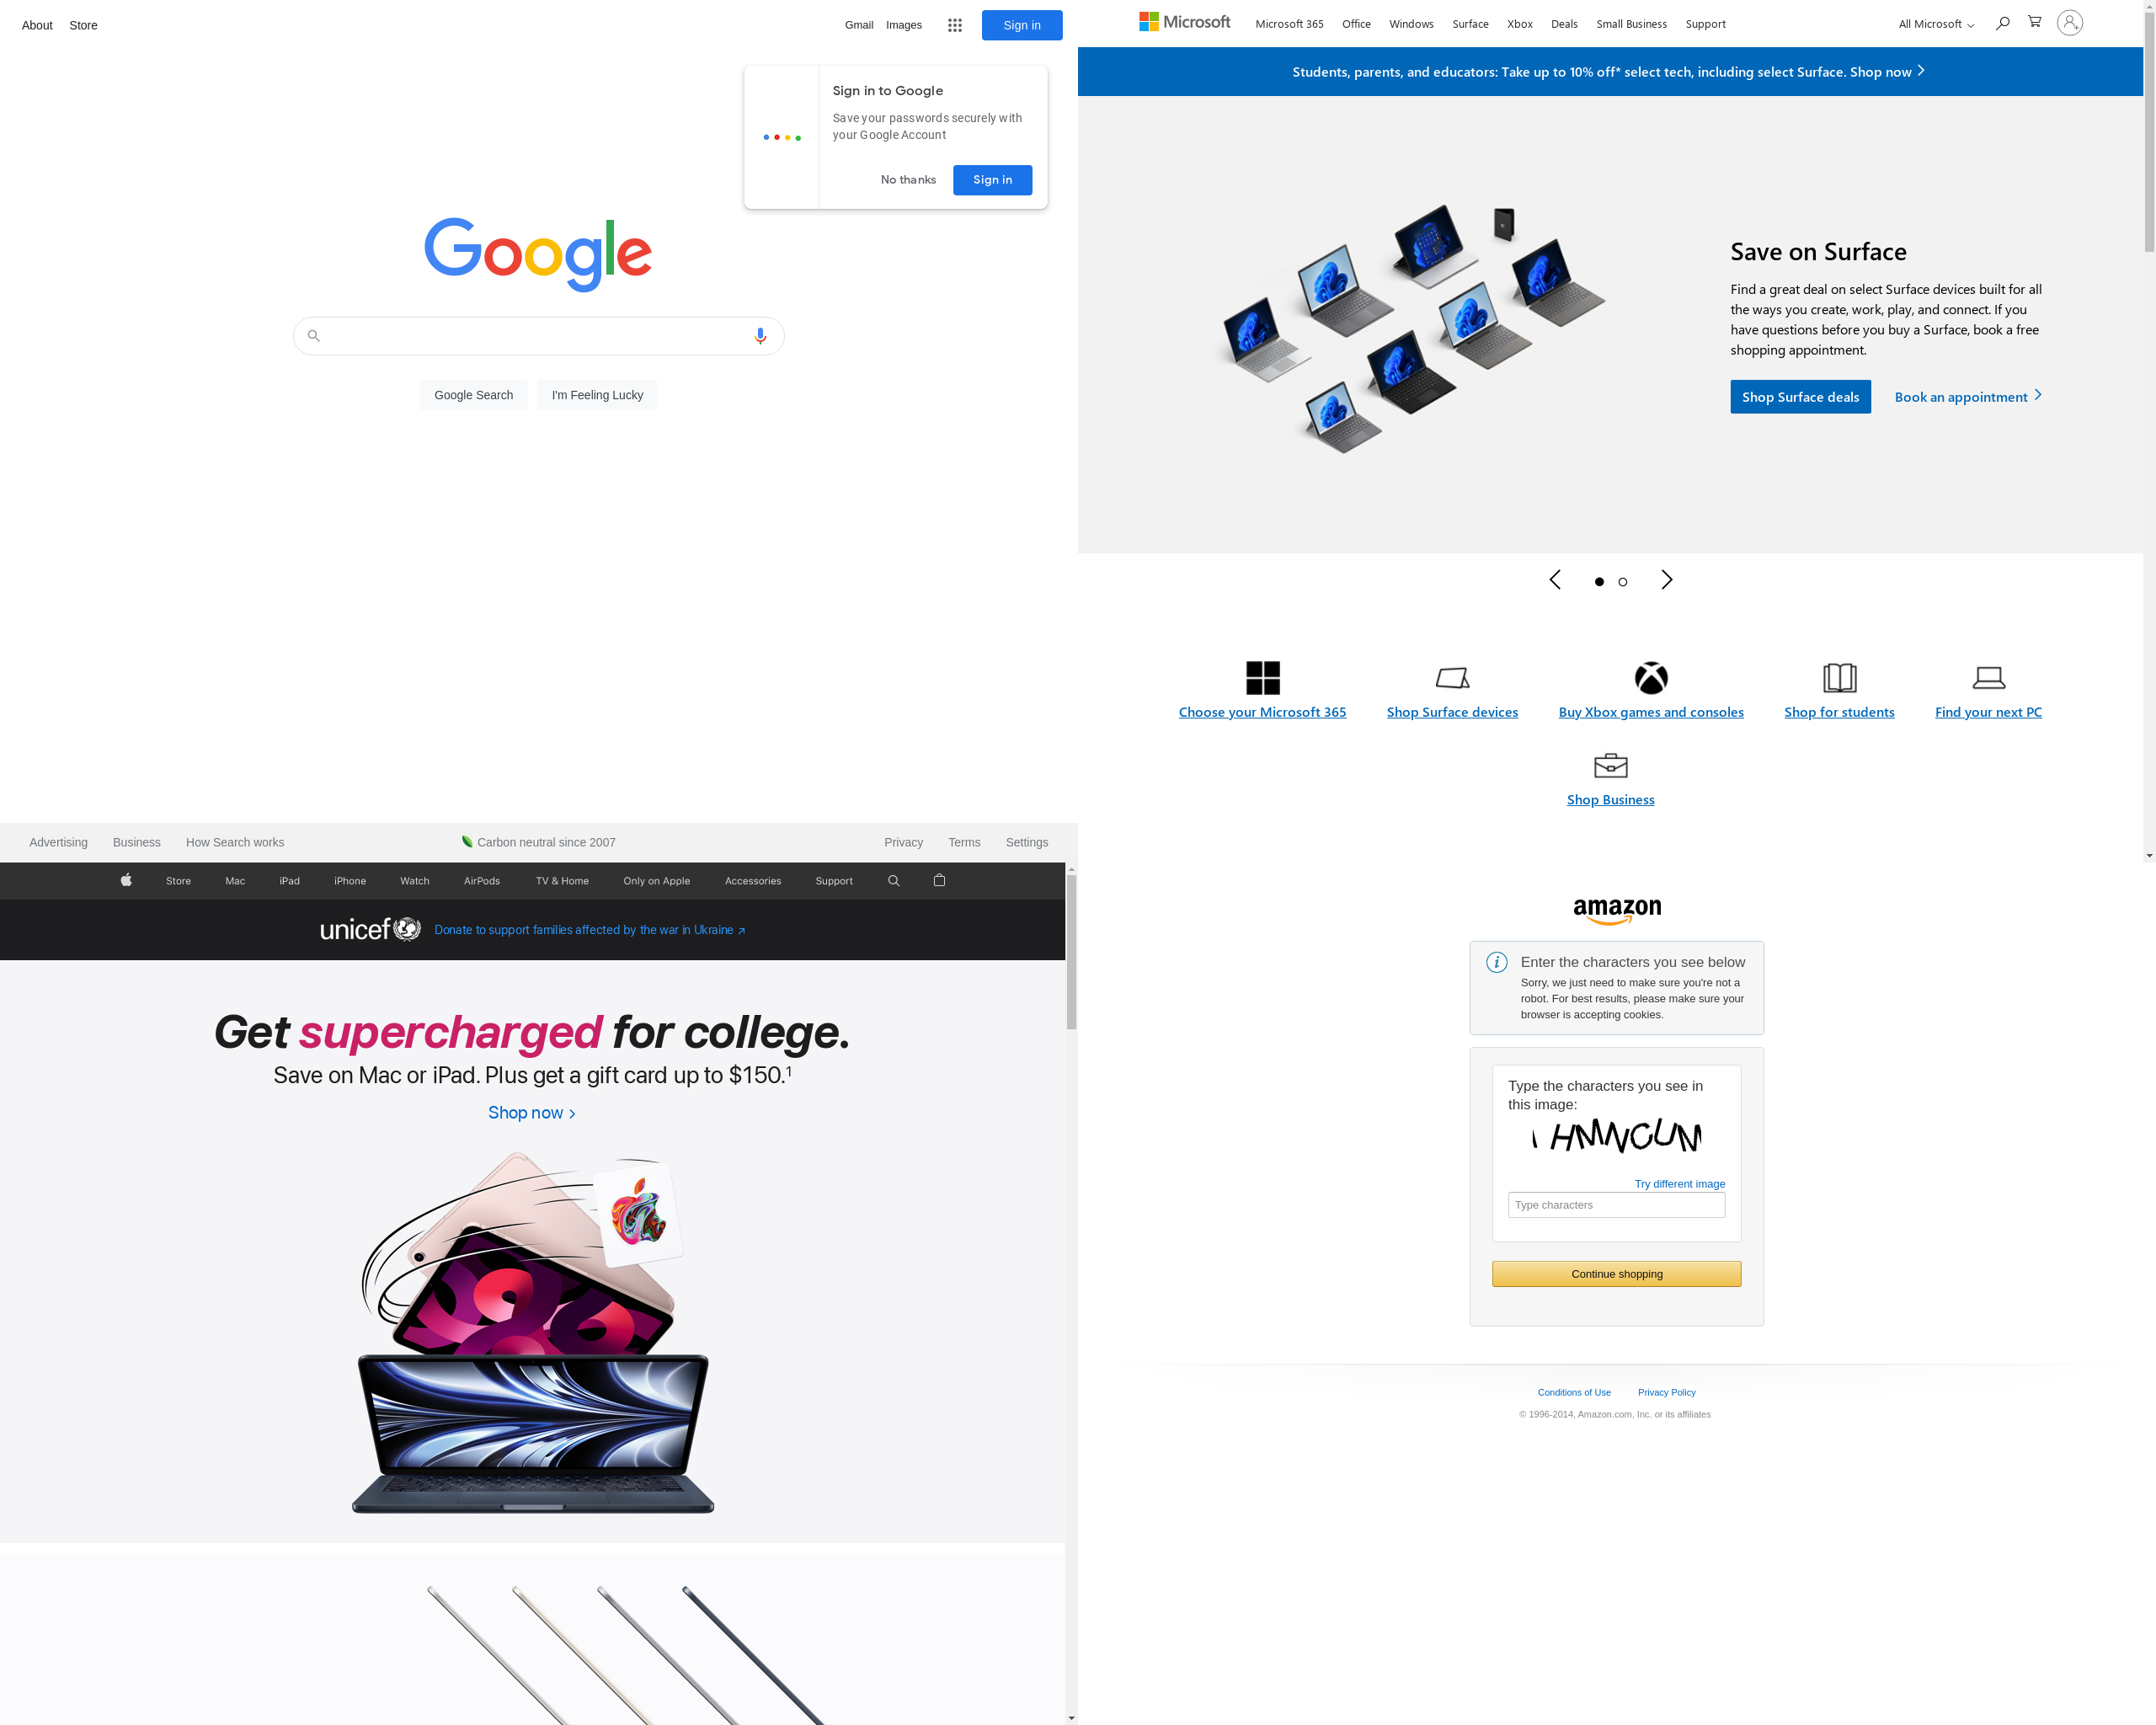

In [161]:
# 將個別的網站截圖彙整成一張大圖

def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid

imgs    = [ Image.open(i) for i in fnames ]
final_img = pil_grid(imgs, num_of_col)
final_img.save(fname_out)
final_img

In [153]:
# 將過程中產製的中繼圖片刪除

for fname in fnames:
  if os.path.exists(fname):
    os.remove(fname)